## Regression is to predict the value of a CONTINUOUS response variable 

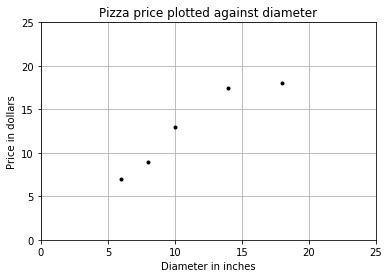

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# X represents the features of our training data which in this case are the diameters
# of the pizzas

# A scikit-learn convention is to name the MATRIX of the feature vectors 'X'.

# Uppercase letters indicate MATRICES and lowercase letter indicate VECTORS.

X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1) 
# reshapes a matrix (rows and cols) we are making this a 
y = [7, 9, 13, 17.5, 18] # A 'List' vector representing the prices of the pizzas

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.') # plt.plot(X, y, fmt = '[marker][line][color]'") 
# k = black and '.' = the dot marker)
plt.axis([0, 25, 0, 25]) # axis scale -  xmin, xmax, ymin, ymax
plt.grid(True) # show grid lines
plt.show() # display the plot 



## There is a positive relationship as the prices increases with the increased diameter of the pizza. This relationship is modeled using Linear Regression - a continuous response variable. Below I will show how Linear Regression works

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # Create the instance of the estimator
model.fit(X, y) # Fit the model on the training data

# Predict the price of a pizza with a diameter that has never been seen before
test_pizza = np.array([[12]])
predicted_price = model.predict(test_pizza) [0]
print('A 12" pizza should cost: $%.2f' % predicted_price)

A 12" pizza should cost: $13.68


## Simple Linear Regression assumes that a linear relationship exists between the RESPONSE variable and the EXPLANATORY variable. A linear surface called a HYPERPLANE is used to model this relationship. A HYPERPLANE is a subspace that has one dimension less than the ambient space that contains it. In simple linear regression there are TWO DIMENSIONS, one each for the EXPLANATORY and the RESPONSE variables. A REGRESSION HYPERPLANE has ONE DIMENSION which is a LINE. 

## From Wiki - In geometry, a hyperplane is a subspace whose dimension is one less than that of its ambient space. If a space is 3-dimensional then its hyperplanes are the 2-dimensional planes, while if the space is 2-dimensional, its hyperplanes are the 1-dimensional lines. ... By its nature, it separates the space into two half spaces.

## The LinearRegression class is an ESTIMATOR which PREDICTS A VALUE based on observed data. In scikit-learn ALL ESTIMATORS implement the 'FIT' and 'PREDICT' methods. The 'FIT' method is used to LEARN THE PARAMETERS of a model and the 'PREDICT' method is used to PREDICT THE VALUE OF A RESPONSE VARIABLE FOR A EXPLANATORY VARIABLE using the LEARNED PARAMETERS. 

## Estimators by category and usage

## https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## y = a + Bx 

## EVALUATING THE FITNESS of a MODEL using the COST FUNCTION ALSO KNOWN AS THE LOSS FUNCTION. The differences in the MODEL between the predicted and observed values are called RESIDUALS or TRAINING ERRORS. 

## The differences in the TEST DATA between the predicted and observed values are called PREDICTION or TEST ERRORS. This is shown by the vertical lines between the regression hyperplane (line) and the points of the training instances.

## I will use the RSS (Residual Sum of Squares) to measure the model's fitness. This is done by SUMMING THE SQUARE RESIDUALS for all of the training examples.

## https://en.wikipedia.org/wiki/Residual_sum_of_squares

## SSres = sum of 'n'(yi - f(xi))**2

## 'n' is the number of observed values, 'yi' is the OBSERVED VALUE and 'f(x)' is the PREDICTED VALUE


In [18]:
# Computing the RSS for the model 

from sklearn.linear_model import LinearRegression
model = LinearRegression() # Create the instance of the estimator
model.fit(X, y) # Fit the model on the training data

# Predict the price of a pizza with a diameter that has never been seen before
test_pizza = np.array([[12]])
predicted_price = model.predict(test_pizza) [0]
# print('A 12" pizza should cost: $%.2f' % predicted_price)
print('Residual sum of squares: %.2f' % np.mean((model.predict(X) - y) ** 2))



Residual sum of squares: 1.75


## OLS (Ordinary Least Squares) or LINEAR LEAST SQUARES

## OLS uses the training data to learn the values of the parameters for SIMPLE LINEAR REGRESSION that produces the best fitting model. 

## Solving the OLS for Simple Linear Regression
## The equation for simple linear regression is y = a + Bx and my goal is to solve for 'a' and 'b' and to minimize the cost function. To solve for 'B' first I have to calculate the VARIANCE of x and the COVARIANCE of 'x' and 'y'. Remember VARIANCE is how far apart a set of values are spread out. If all of the values in the set are equal then we have NO VARIANCE '0'. A SMALL VARIANCE indicates the values are NEAR THE MEAN of the set. Conversely, a LARGE VARIANCE indicates the values are FAR FROM THE MEAN AND EACH OTHER.

## VARIANCE is calculated by the SQUARING the DIFFERENCE between EACH VALUE and the MEAN and DIVIDING that by the NUMBER OF INSTANCES MINUS 1. 

## var(x) = sum of all 'n' (xi - x_bar)**2/n-1

## x_bar is the mean of x and xi is the value of x for ith training instance and n is the number of training instances

In [19]:
import numpy as np
X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
x_bar = X.mean()
print('Mean: ', x_bar)


Mean:  11.2


In [20]:
# Note that I subtract one from the number of trraining instances when 
# calculating the sample variance.
# This technique is called Bessel's correction. It corrects the bias in the estimation 
# of the population variance from a sample.

variance = ((X - x_bar)**2).sum() / (X.shape[0] - 1)
print('Variance: ', variance)

Variance:  23.2


## Covariance is a measure of how much two variables change together. If they INCREASE  TOGETHER their COVARIANCE IS POSITIVE, if one INCREASES while the other DECREASES, their COVARIANCE IS NEGATIVE. If they have no effect on each other, their COVARIANCE IS ZERO.

## covar(x,y) = (xi - x_bar)(yi - y_bar)/n-1

In [52]:
# I will calculate the covariance
# I used a list before to represent y but I will now use a numpy array which has a method to calculate the mean.
# This is a List - 'y = [7, 9, 13, 17.5, 18]'
# the following is an numpy array. Note the difference
y = np.array([7, 9, 13, 17.5, 18])
y_bar = y.mean()

# I will transpose 'X' because both operands need to be 'row' vectors. 
# See what 'X' originally was
# print(X - x_bar)
# [[-5.2]
# [-3.2]
# [-1.2]
# [ 2.8]
# [ 6.8]] 
X_cov = np.transpose(X - x_bar)
covariance = np.multiply(X_cov, y - y_bar).sum() / (X.shape[0] - 1)
print('Covariance: ', covariance)

Covariance:  22.65


## Now that I have calculated the VARIANCE of the EXPLANATORY VARIABLES and the COVARIANCE of the RESPONSE and EXPLANATORY VARIABLES, I can solve for 'b' which is the following formula:
## cov(x,y) / var(x), 22.65 / 23.2 = 0.98 roughly

## Now we can solve for 'a', 'y_bar' is the mean of 'y'
## a = y_bar - Bx
## Here 'y_bar' is the mean of 'y' and  'x_bar' is the mean of 'x'.
## 'x_bar' and 'y_bar' are the COORDINATES of the CENTROID, a POINT THAT THE MODEL MUST PASS THROUGH.

## a = 12.9 - 0.98 * 11.2 = 1.97 roughly

## Evaluating the Model

## I have used a learning algorithm (ESTIMATOR) to estimate a model's parameters from the TRAINING DATA. How can I assess whether the model is a good representation of the real relationship? I will now add a fourth columns which contains the prices predicted by the model. 

## I can evaluate my model's predictive capacity using a measure called 'R-SQUARED' also known as the 'COEFFICIENT OF DETERMINATION'. In the case of SIMPLE LINEAR REGRESSION, 'R-SQUARED' is equal to the square of the 'PEARSON PRODUCT-MOMENT CORRELATION COEFFICIENT' (PPMCC) or 'PEARSON'S R'. 'R-SQUARED' must be a positive number from '0' to '1', if 'R-SQUARED' describes the proportion of variance in the RESPONSE VARIABLE that is explained by the model, it cannot be greater than '1' or less than '0'. Other methods do not calculate 'R-SQUARED' as the square of 'PEARSON'S R'. 'R-SQUARED' can be negative if the model performs poorly and is sensitive to outliers and can increase as features are added to the model. 

## Using the method used by scikit-learn to calculate 'R-SQUARED'. 
## First I must measure the 'SUM OF SQUARES'. 'yi' is the 'OBSERVED VALUE' of the 'RESPONSE VALUE' for the 'ith' 'TEST INSTANCE' and 'y_bar' is the MEAN OF THE OBSERVED VALUES OF THE RESPONSE VARIABLES.

## SStot = sum of all 'n'(yi - y_bar)**2

## Next I must find the RSS
## SSres = sum of 'n'(yi - f(xi))**2  
## 'n' is the number of observed values, 'yi' is the OBSERVED VALUE and 'f(x)' is the PREDICTED VALUE

## Finally I find R-SQUARED using the following

## R**2 = 1 - SSres / SStot
## In this instance it would be 1 - 19.20 / 56.8 = 0.66 roughly
## The 'SCORE' method of 'LinearRegression' returns the model's 'R-SQUARED' value. 

In [73]:
import numpy as np
from sklearn.linear_model import LinearRegression

X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = [7, 9, 13, 17.5, 18]

X_test = np.array([8, 9, 11, 16,12]).reshape(-1, 1)
y_test = [11, 8.5, 15, 18, 11]

model = LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_test, y_test)
print('This is the r_squared value of the model: %.2f' %r_squared)

This is the r_squared value of the model: 0.66
